### Breast Cancer Dataset

In [9]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
cancer = load_breast_cancer()
# train, test= train_test_split(cancer, stratify=cancer.target, random_state=42)
# x_train = train.data
# y_train = train.target
# x_test = test.data
# y_test = test.target
# tree = DecisionTreeClassifier(random_state = 0)
# tree.
X_train, X_test, y_train, y_test = train_test_split(
cancer.data, cancer.target, stratify=cancer.target, random_state=42)

In [10]:
tree = DecisionTreeClassifier(random_state=0)
tree.fit(X_train, y_train)
print("Accuracy on training set: {:.3f}".format(tree.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(tree.score(X_test, y_test)))

Accuracy on training set: 1.000
Accuracy on test set: 0.937


In [11]:
#Pre-pruning
tree = DecisionTreeClassifier(max_depth=4,random_state=0)
tree.fit(X_train,y_train)
print("Accuracy on training set: {:.3f}".format(tree.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(tree.score(X_test, y_test)))

Accuracy on training set: 0.988
Accuracy on test set: 0.951


### Analyzing decision trees

'https://towardsdatascience.com/scikit-learn-decision-trees-explained-803f3812290d'

In [8]:
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier

iris = load_iris()
#display(iris.data)
iris.feature_names
X = pd.DataFrame(iris.data,columns = iris.feature_names)
y = pd.DataFrame(iris.target, columns = ["Species"])
tree = DecisionTreeClassifier(max_depth=2)
tree.fit(X,y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=2,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [9]:
from sklearn.tree import export_graphviz

# Creates dot file named tree.dot
export_graphviz(
            tree,
            out_file =  "myTreeName.dot",
            feature_names = list(X.columns),
            class_names = iris.target_names,
            filled = True,
            rounded = True)

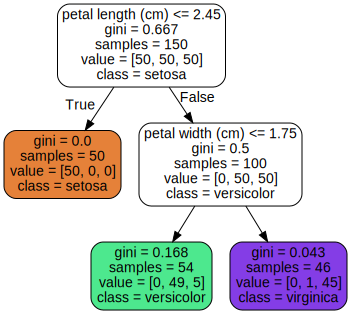

In [10]:
import graphviz
with open("myTreeName.dot") as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)